In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import random 
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import shapiro
import math
import time
import jellyfish
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:


# In this assignment we want to estimate the overlap between two (possibly very large, even Billions, 
# it should not matter) data sets A and B.
# The argument used is the following. We start by considering two random large but managable subsets subA 
# of A and subB of B.
# Then we calculate explicitely the number of entries in the intersection a and b.
# Using some basic probability theory, we can then estimate the proportion of A that is in B by the 
# following formula:
#  P(A and B)= #(subA and subB)/(P(subA)P(subB))

# We then use Monte Carlo to repeat this argument multiple times and get a good estimate.

# We start by opening the two files A and B


fileA = pd.read_excel('C:\\Users\\dj500\\Desktop\\Things\\Post doc\\KPMG assignment\\datasetA.xlsx',dtype=str)
fileB = pd.read_excel('C:\\Users\\dj500\\Desktop\\Things\\Post doc\\KPMG assignment\\datasetB.xlsx',dtype=str)


pd.set_option('display.width', 120)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)


#

In [4]:
#Here we define the levenshtein distance to allow for not exact matches

def dist_arrays_SS(arr1,arr2):   #levenshtein distance using only SS
    return jellyfish.levenshtein_distance(str(arr1[11]),str(arr2[11]))

def dist_dataset(x,Y,delta_SS,delta_total,min_count):   #returns elements in B that are close to a in subA
    subY=[y for y in Y if dist_arrays_SS(x,y)<=delta_SS]  #first we find elements with up to delta_SS mistakes in the SS number
    subsubY=[]
    for y in subY:  #then we consider only the elements in subB to find sufficiently similar elements
        count=0
        for i in [0,1,3,5,8,10]:  ## for long strings we use levenshtein
            if len(str(x[i]))>0 and len(str(y[i]))>0 and str(x[i])!="nan" and str(y[i])!="nan" and jellyfish.levenshtein_distance(str(x[i]),str(y[i]))<=delta_total: #in each string, we admit up to delta_total mistakes
                count+=1
        if count>=min_count: #we require at least min_count strings to be similar
            subsubY.append(y)
            break
        if len(subsubY)>1:
            print("MISTAKE! There are {} correspondants.".format(len(subsubY)))
    return subsubY

In [11]:

N=len(fileA)  #size A and B
n=600    #size a and b



    ### ALLOWED MISTAKES ###

delta_SS = 3    #max number of mistakes allowed for Social Security number
delta_total = 3 #max mistakes for each other strings
min_count = 3  #min number of strings which are similar, excluding SS


start_time = time.time()

#Now we define the random samples a of A and b of B of size 1000

MC = 100  #Number of times we want to repeat this argument and calculate the mean
mean=0  #initialise at zero
fn=[]  #list of matches

for i in range(MC):
    # Select random rows from fileA
    subA = fileA.sample(n).values

    # Select random rows from fileB
    subB = fileB.sample(n).values



        ### CALCULATE INTERSECTION ###

    interB = []
    interA = []
    
    ETA = (time.time() - start_time)*(MC-i-1)/(i+1)

    for a in subA:
        for b in dist_dataset(a,subB,delta_SS,delta_total,min_count):
            interB.append(b)
            interA.append(a)
    fn.append(len(interB)*(N/n**2)*100) #percentage of expected correct data
    
    print("{}/{}: We obtain {} matches. ETA: {}s".format(i+1,MC,len(interB), round(ETA,1)))  #debugging




print("\n\n")


print("We expect {}% of data to be in the intersection".format(round(np.mean(fn),2)))
timetotal=round(time.time() - start_time,2)
print("--- {} seconds --- time per iteration: {} ".format(timetotal, timetotal/MC))




1/100: We obtain 18 matches. ETA: 0.3s
2/100: We obtain 26 matches. ETA: 33.2s
3/100: We obtain 19 matches. ETA: 45.0s
4/100: We obtain 18 matches. ETA: 49.6s
5/100: We obtain 14 matches. ETA: 51.5s
6/100: We obtain 20 matches. ETA: 53.1s
7/100: We obtain 15 matches. ETA: 54.0s
8/100: We obtain 20 matches. ETA: 54.5s
9/100: We obtain 10 matches. ETA: 54.8s
10/100: We obtain 18 matches. ETA: 54.8s
11/100: We obtain 21 matches. ETA: 54.8s
12/100: We obtain 14 matches. ETA: 54.5s
13/100: We obtain 18 matches. ETA: 54.1s
14/100: We obtain 19 matches. ETA: 53.9s
15/100: We obtain 15 matches. ETA: 53.5s
16/100: We obtain 15 matches. ETA: 53.6s
17/100: We obtain 24 matches. ETA: 53.1s
18/100: We obtain 15 matches. ETA: 52.5s
19/100: We obtain 22 matches. ETA: 52.4s
20/100: We obtain 13 matches. ETA: 52.4s
21/100: We obtain 20 matches. ETA: 52.1s
22/100: We obtain 18 matches. ETA: 51.7s
23/100: We obtain 20 matches. ETA: 51.3s
24/100: We obtain 21 matches. ETA: 50.8s
25/100: We obtain 21 match

In [13]:
#Here we can see some examples of the intersection from data set A

datafA= pd.DataFrame(interA)
datafA.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11
0,lillianna,wilde,1108,macdowell street,NaN,gwynneville,4227,qld,NaN,33,03 78088854,1388335
1,serena,schuster,5,NaN,NaN,kangaroo flat,6220,qld,19181107,30,07 09548302,7763312
2,jayden,george,16,chave street,brentwood vlge,kariong,2072,sa,19210326,34,04 72471874,3351035
3,lily,leggio,4,lachlan street,NaN,greensborough,2576,qld,19291010,33,03 70702731,3458484
4,shane,mcneill,39,wakefield avenue,NaN,corrimal east,2025,nsw,NaN,NaN,07 73035212,6669428
5,sophie,hyland,11,saggers retreat,foxlea,seymour,3919,nsw,19271113,29,02 39304044,9333298
6,chloe,miles,23,scrivener street,NaN,moorabbin,4670,NaN,19730910,28,03 70236216,5556027
7,dean,block,60,clarey crescent,NaN,port campbell,2615,nsw,19130714,40,08 58691098,9660328
8,ayla,fullgrabe,24,euroka street,NaN,glengarry,2251,NaN,19681004,28,03 81394558,1630602
9,seth,guymer,25,meymott place,NaN,edensor park,2299,vic,19960625,23,04 83480181,7191616


In [14]:
#Here we can see some examples of the intersection from data set A

datafB= pd.DataFrame(interB)
datafB.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,lillianna,wilde,1108,street macdowell,NaN,gwynne vinlle,4227,qls,NaN,33.0,378088854,1388335
1,seedna,schuster,40,NaN,NaN,kangaroo flat,6220,qld,19181107,30.0,709548302,7763312
2,jayden,geomrge,16,chave street,brentwood vlge,karjong,2072,sa,19210326,34.0,472471874,3357135
3,lily,legpbio,4,lachlan street,NaN,greensborugh,2576,qld,NaN,33.0,370702731,3458484
4,shane,mcndill,39,wakefieldaavenue,NaN,corrimal east,2025,nsw,NaN,NaN,773035212,6669748
5,hylaqnd,sophie,14,saggers retreat,foxlea,seymour,3919,nsw,19271113,29.0,239304044,9333298
6,chloe,miles,40,scrivener street,NaN,moorabbin,4670,NaN,19730910,28.0,370236216,5556027
7,dean,block,60,clarey crescent,NaN,port campbell,2615,nsw,19130914,40.0,858591908,9660328
8,ayla,fullgrkrabe,24,euroka street,NaN,glengarry,2251,NaN,19681004,28.0,381295558,1630602
9,segh,guymker,25,meymott place,NaN,edensor park,2299,vic,19969622,23.0,483480181,7191616


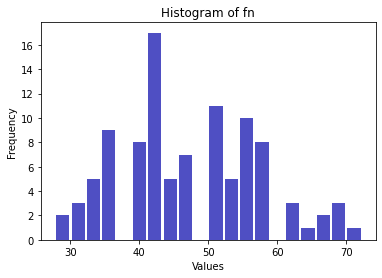

We can say with 99.0% confidence that between 44.4-49.8% of the data in table A also belongs to table B.


In [16]:
# now we do a complete statistical study

# Specify the number of bins (adjust as needed)
num_bins = 20

plt.hist(fn, bins=num_bins, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Histogram of fn')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

confidence=0.99  #confidence interval

confidence_interval = np.round(t.interval(confidence, len(fn)-1, loc=np.mean(fn), scale=stats.sem(fn)),1)
print("We can say with {}% confidence that between {}-{}% of the data in table A also belongs to table B.".format(confidence*100, confidence_interval[0], confidence_interval[1]))